### Before we start with plotting: How to choose optimal bandwidth for KDE?

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.44.6770&rep=rep1&type=pdf (page 11)
https://cran.r-project.org/web/packages/kedd/vignettes/kedd.pdf (chapter 4.1)

How python can help us with it? -> scipy does it automatically - just choose the method
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
It uses Scotts; Silvermanns rule's of thumb

Other option -> cross-validation #more details https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

In [3]:
cv = KFold(n_splits=5)
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=cv)
grid.fit(x[:, None]);

In [4]:
grid.best_params_

{'bandwidth': 0.38535285937105296}

In [5]:
#Now we can find the choice of bandwidth which maximizes the score (which in this case defaults to the log-likelihood)

### Plotting

## Seaborn is a package for statistical data visualisation

Official documentation page: https://seaborn.pydata.org/index.html

In [6]:
!pip install seaborn #or !conda install seaborn

You should consider upgrading via the '/Users/izzy/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style("darkgrid")

In [9]:
# distribution plot

In [14]:
df = sns.load_dataset('mpg')

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


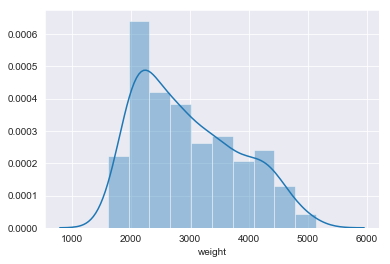

In [16]:
sns.distplot(df.weight) # we get a histogram and kde

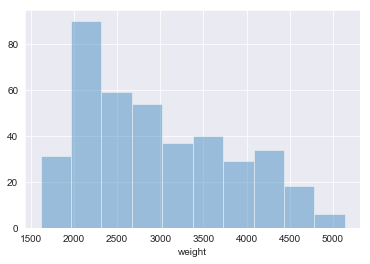

In [18]:
sns.distplot(df.weight, kde=False)

/Users/izzy/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/izzy/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


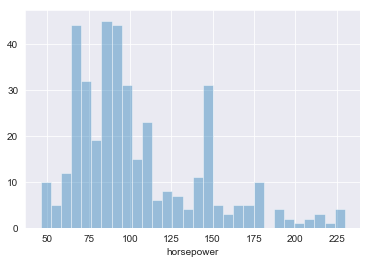

In [19]:
sns.distplot(df.horsepower, kde=False, bins=30)

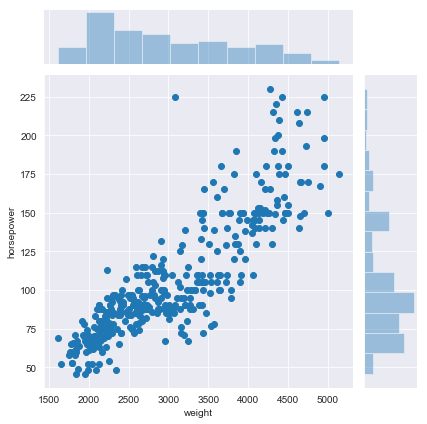

In [20]:
sns.jointplot(x='weight', y='horsepower', data=df)

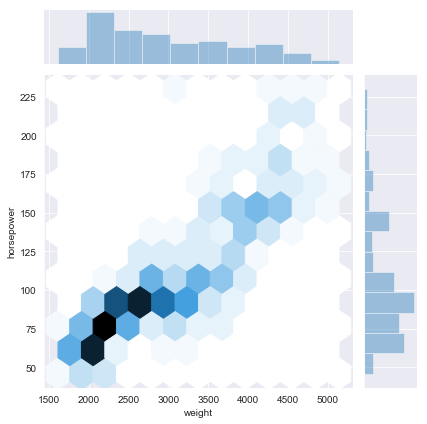

In [22]:
sns.jointplot(x='weight', y='horsepower', data=df, kind='hex')

In [23]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [24]:
df.cylinders = df.cylinders.astype('category')

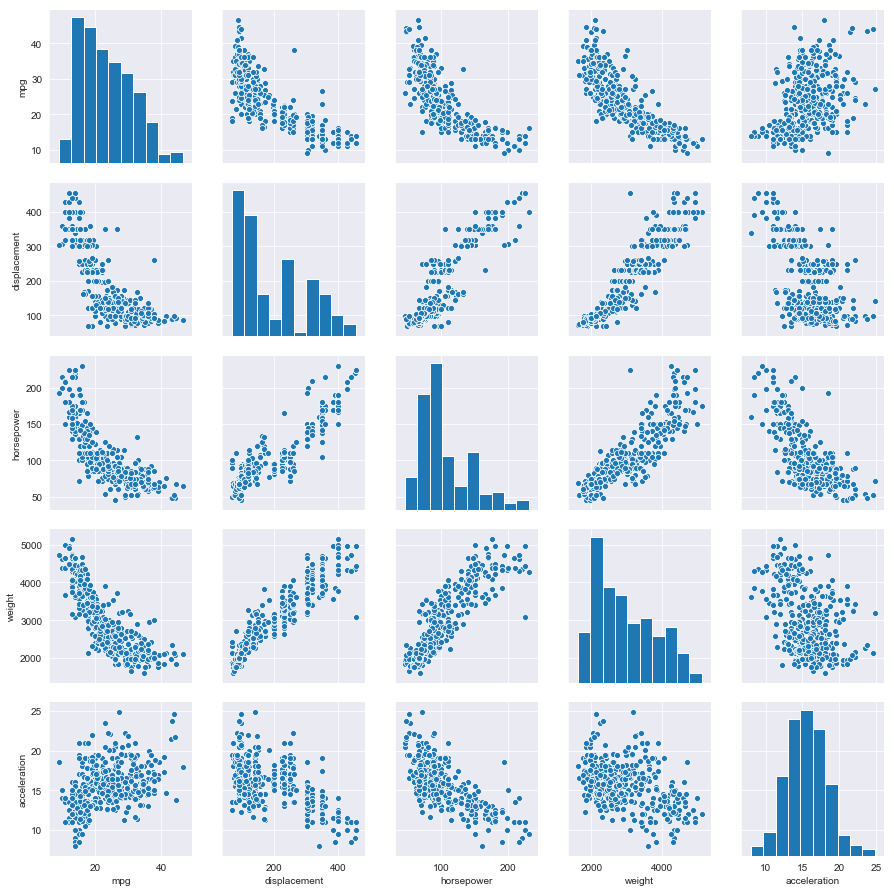

In [30]:
sns.pairplot(df.drop(['cylinders','model_year'], axis=1))

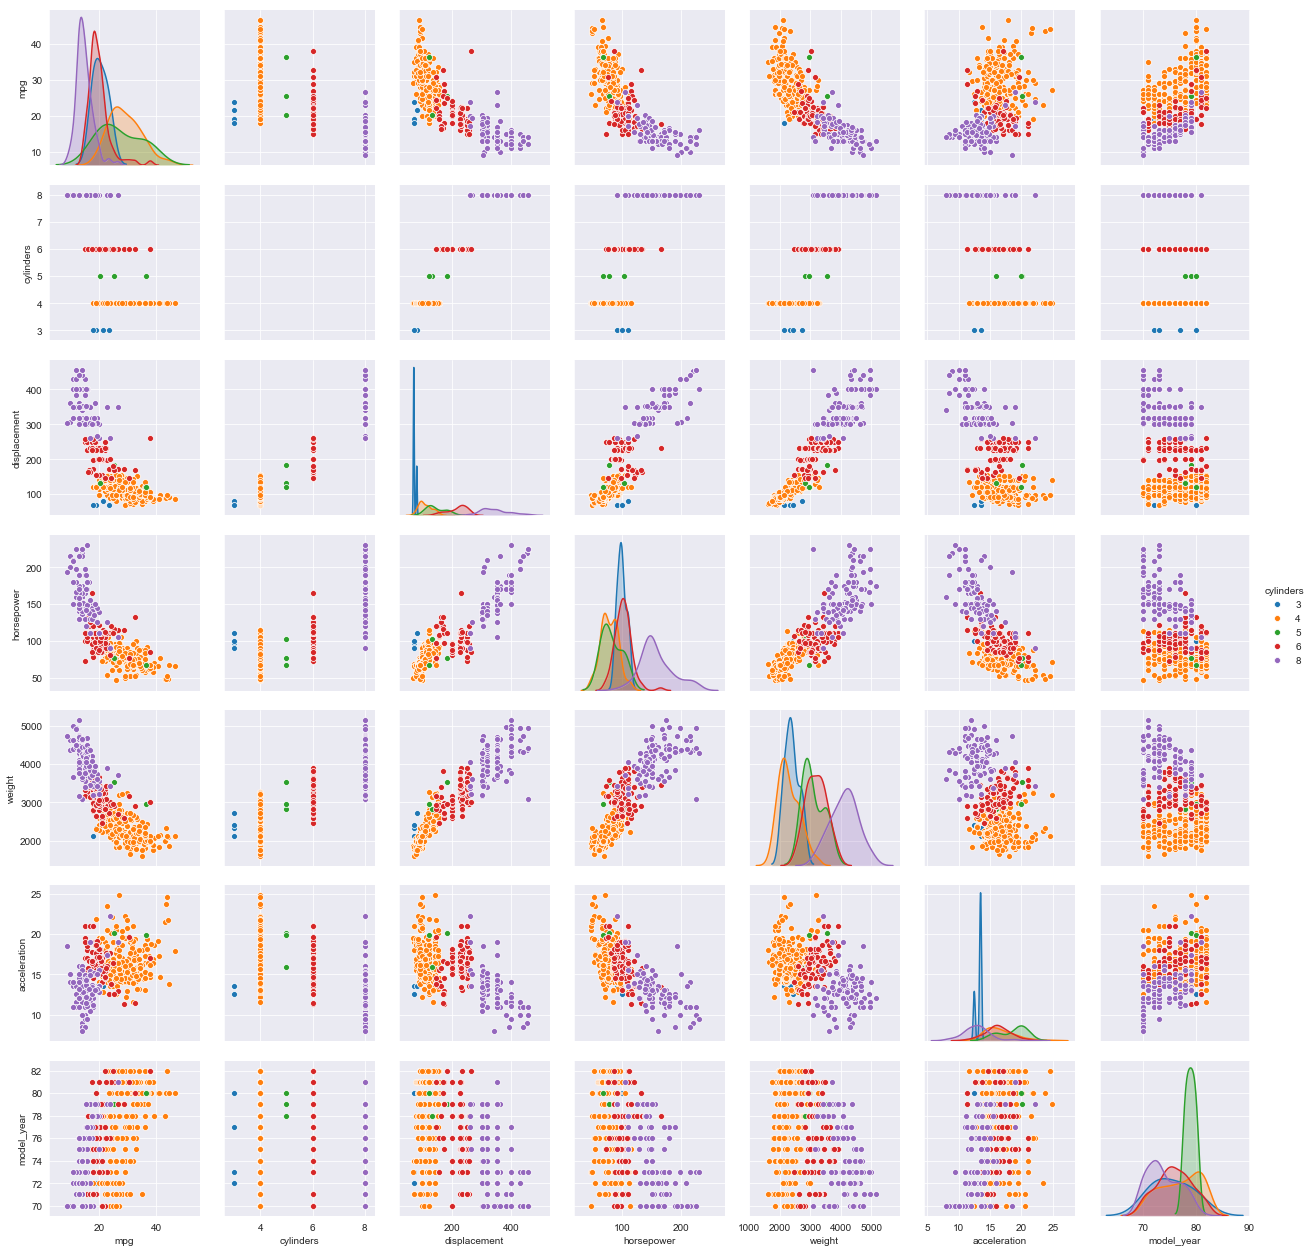

In [32]:
sns.pairplot(df, hue='cylinders')

### Categorical data

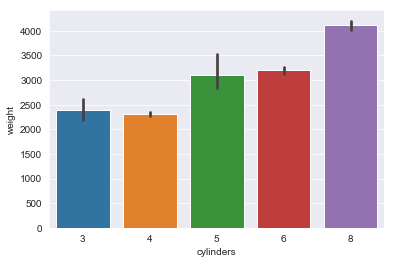

In [33]:
sns.barplot(x='cylinders', y='weight', data=df)

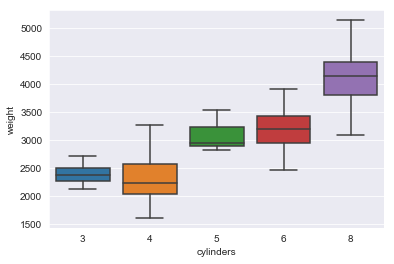

In [34]:
sns.boxplot(x='cylinders', y='weight', data=df)

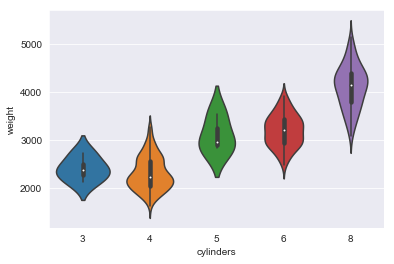

In [35]:
sns.violinplot(x='cylinders', y='weight', data=df)

### Other Plots

In [36]:
cor = df.corr()

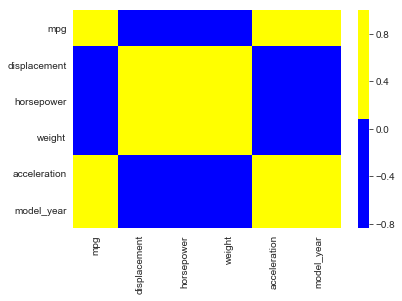

In [38]:
sns.heatmap(cor) # annot, cmap coolwarm, linewidth, linecolor, clustermap

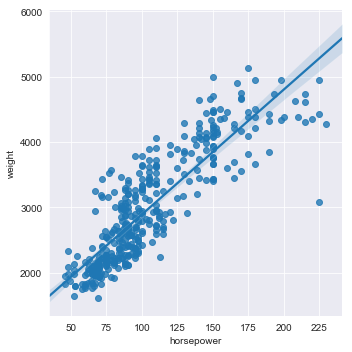

In [39]:
sns.lmplot(x='horsepower', y='weight', data=df)

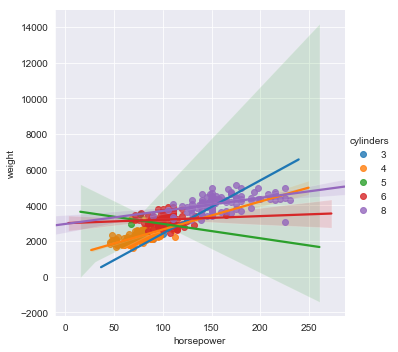

In [40]:
sns.lmplot(x='horsepower', y='weight', data=df, hue='cylinders')

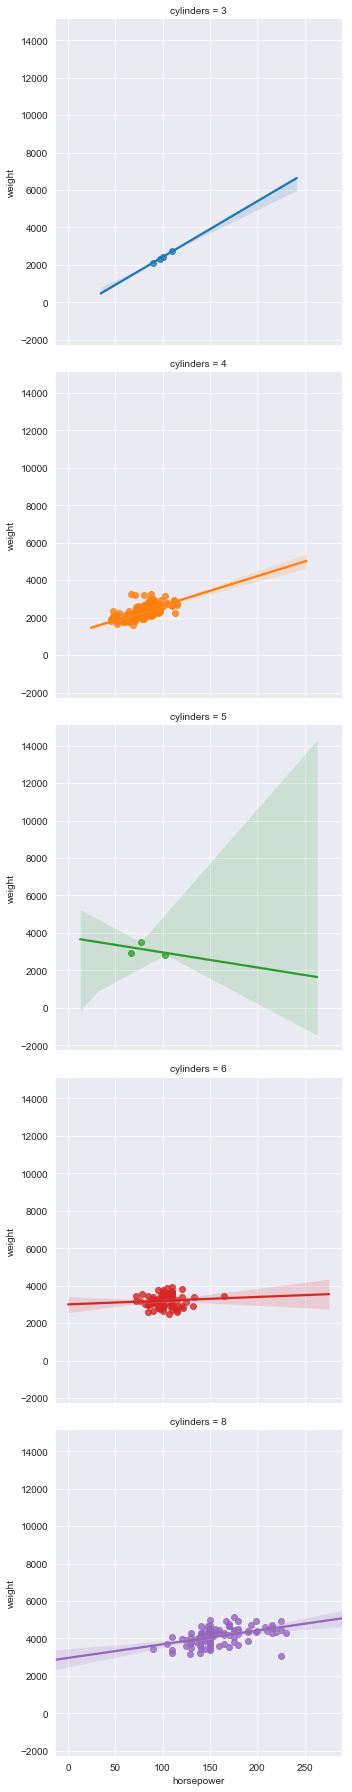

In [41]:
sns.lmplot(x='horsepower', y='weight', data=df, hue='cylinders', row='cylinders')

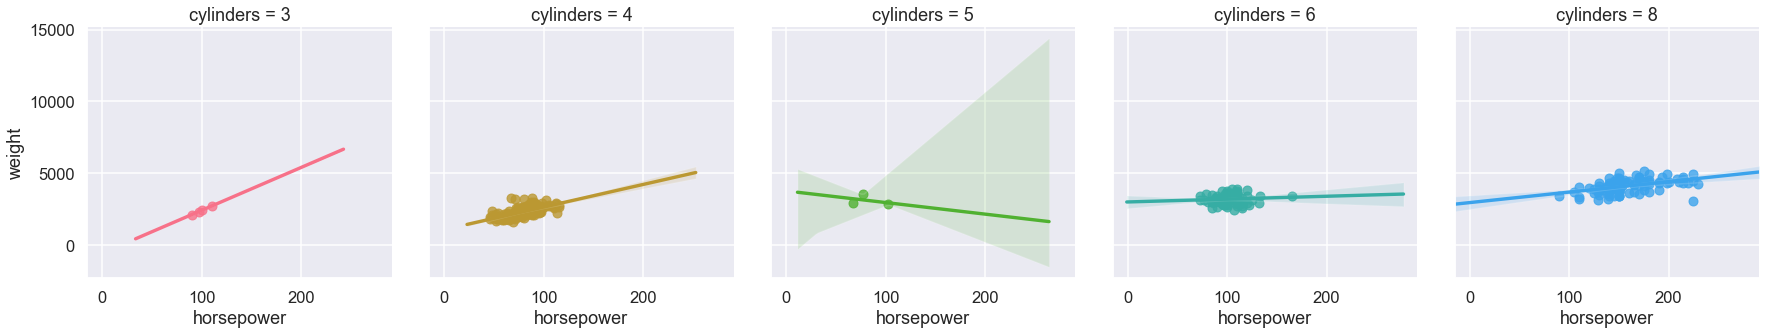

In [73]:
sns_plt = sns.lmplot(x='horsepower', y='weight', data=df, hue='cylinders', col='cylinders', ci=95)
sns_plt.savefig('grid_plot.png', transparent=True)

### Grid

In [92]:
# you can get more control over e.g., pairplots specifying the grid and what you want to plot explicitly.
#https://seaborn.pydata.org/tutorial/axis_grids.html

In [48]:
tips = sns.load_dataset("tips")

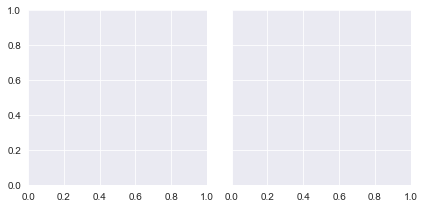

In [49]:
g = sns.FacetGrid(tips, col="time")

In [51]:
import matplotlib.pyplot as plt

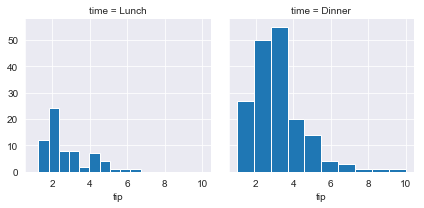

In [52]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

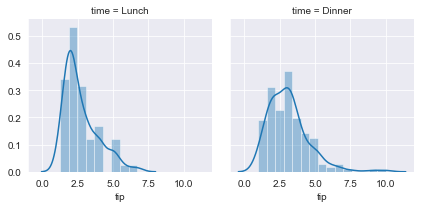

In [53]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.distplot, "tip");

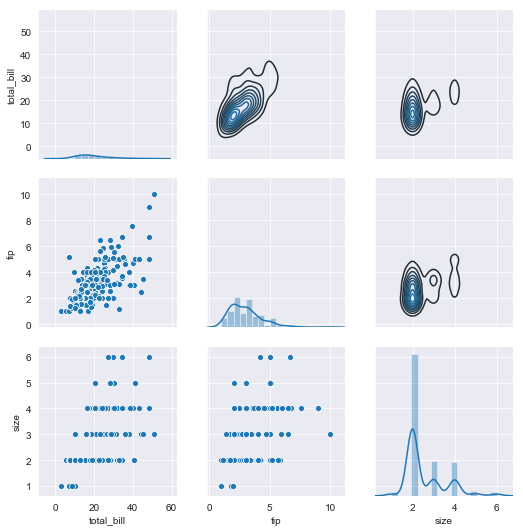

In [54]:
g = sns.PairGrid(tips)
g.map_diag(sns.distplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

### Color

In [114]:
# we took the example from here https://seaborn.pydata.org/tutorial/aesthetics.html#scaling-plot-elements

In [55]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

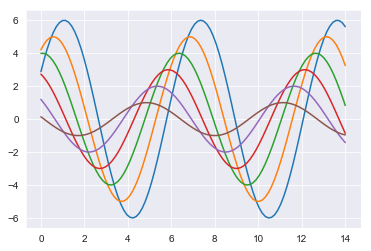

In [56]:
sinplot()

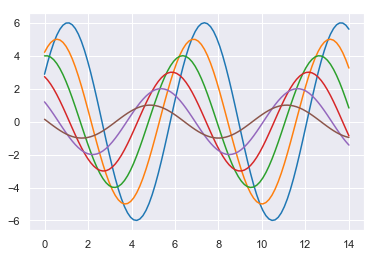

In [57]:
sns.set_context('notebook')
sinplot()

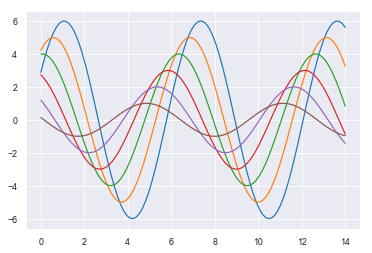

In [58]:
sns.set_context('paper')
sinplot()

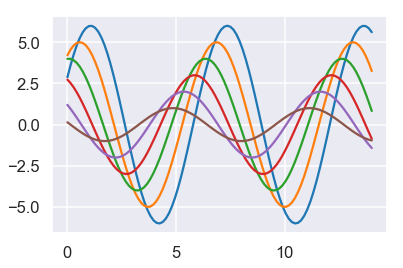

In [59]:
sns.set_context("talk")
sinplot()

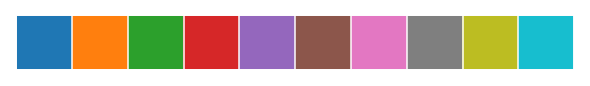

In [60]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

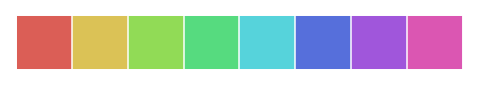

In [61]:
sns.palplot(sns.color_palette("hls", 8))

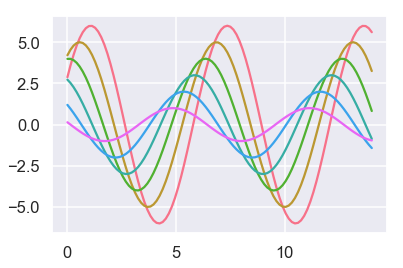

In [62]:
sns.set_palette("husl")
sinplot()

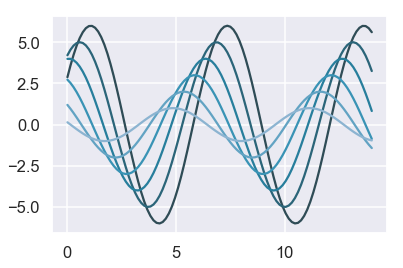

In [63]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

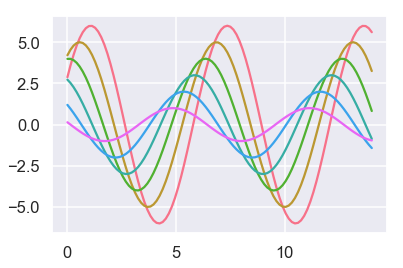

In [64]:
sinplot()

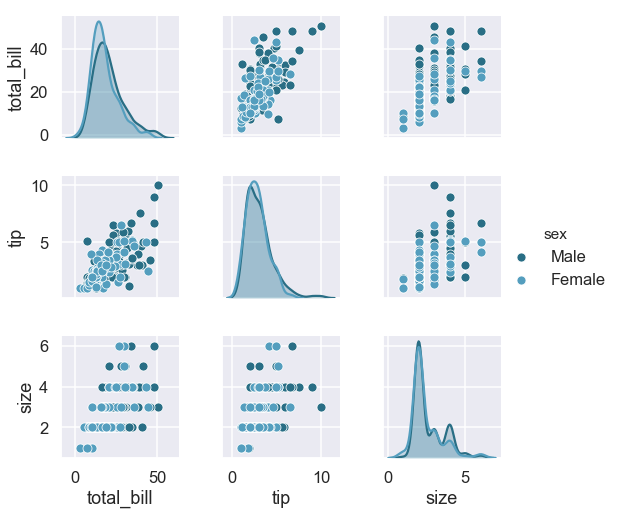

In [65]:
sns.pairplot(tips, palette="PuBuGn_d", hue='sex')

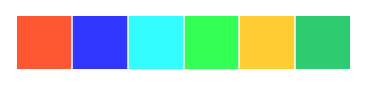

In [66]:
pal = ["#FF5733", "#3336FF", "#33FCFF", "#33FF55", "#FFCE33", "#2ecc71"]
sns.palplot(sns.color_palette(pal))

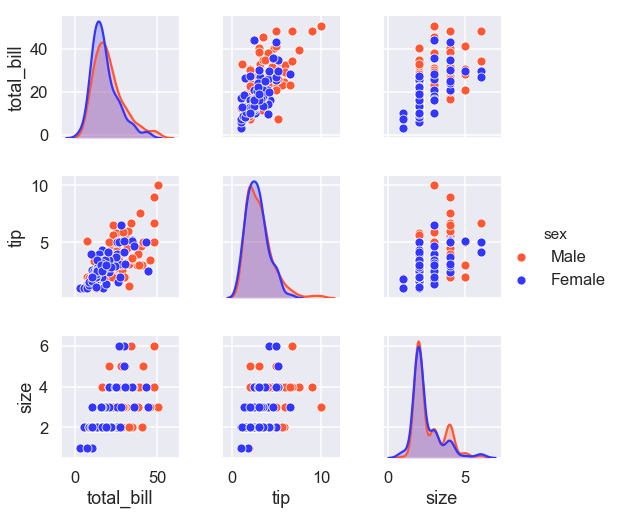

In [67]:
sns.pairplot(data=tips, palette=sns.color_palette(pal), hue='sex')

In [75]:
sns.set_style("white")

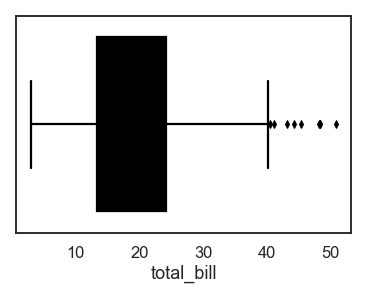

In [78]:
sns.boxplot(tips.total_bill, color='black')
plt.savefig('white_plot2.png', transparent=True)

In [69]:
sns.set_style("darkgrid")

In [134]:
# Palette list: https://matplotlib.org/tutorials/colors/colormaps.html

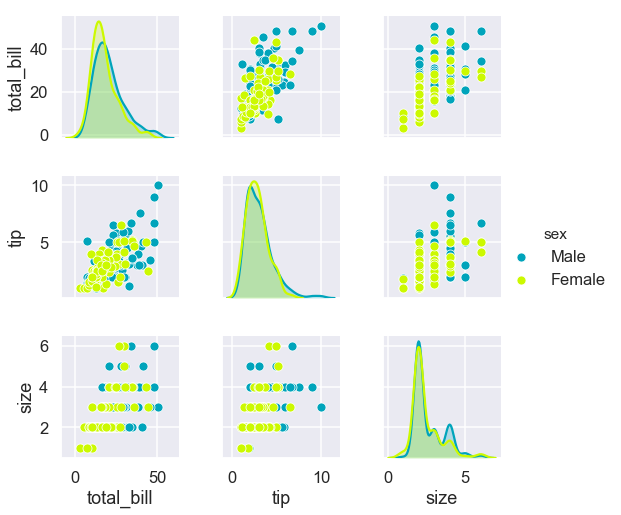

In [70]:
sns.pairplot(tips, palette="nipy_spectral", hue='sex')

https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

[‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, 
 ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, 
 ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, 
 ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, 
 ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, 
 ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, 
 ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, 
 ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, 
 ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, 
 ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’,
 ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’,
 ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, 
 ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’,
 ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, 
 ‘inferno_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, 
 ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’,
 ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’,
 ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’,
 ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’,
 ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘twilight’,
 ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’]